# CPI prediction project - STATS 131
Group memebers: Kaixin Wang, Qin Hu, Ruby Zhang, Emily Suan

## 1. Objective:
To predict CPI (customer price index) of countries using predictors relevant to economic growth. 

## 2. Introduction:
### Datasets:
* GDP_and_GDP_Per_Capita.csv (1)
* Expenditure_on_Health.csv (2)
* Production_Trade_and_Supply_of_Energy.csv (3)
* Internet_Usage.csv (4)
* Public_Expenditure_on_Education.csv (5)
* Tourist_Visitors_Arrival_and_Expenditure.csv (6)
* GDP_on_R&D.csv (7)
* Exchange_Rates.csv (8)
* Consumer_Price_Index.csv (9)

### Variables from datasets:
* response: CPI (9)
* predictors:
    - GDP (1)
    - expenditure on health (2)
    - energy usage (3)
    - Internet usage (4)
    - expenditure on education (5)
    - expenditure on tourism (6)
    - expenditure on science & technology (7)
    - exchange rate (8)
    
### Datasets sources:
United Nations: http://data.un.org/
- National accounts (1)
    - GDP and GDP per capita
- Nutrition and health (2)
    - Health expenditure
- Energy (3)
    - Energy production, trade and consumption
- Communication (4)
    - Internet usage
- Education (5)
    - Public expenditure on education
- Science and technology (7)
    - Human resources in R & D
- Finance (8)
    - Exchange rates
- Price and production indices (9)
    - Consumer price indices
   

## 3.  Data Clean-up:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# handling warning messages:
import warnings
warnings.filterwarnings('ignore')

In [3]:
CPI = pd.read_csv("Consumer_Price_Index.csv", encoding ="ISO-8859-1")
CPI.Series.unique()  # to extra certain rows
CPI = CPI.loc[CPI.Series == 'Consumer price index: General']
countries = CPI.Country.unique()
CPI.head()

,ID,Country,Year,Series,Value
0,4,Afghanistan,2005,Consumer price index: General,71.1
1,4,Afghanistan,2010,Consumer price index: General,100.0
2,4,Afghanistan,2014,Consumer price index: General,133.1
3,4,Afghanistan,2015,Consumer price index: General,132.1
4,4,Afghanistan,2016,Consumer price index: General,137.9


In [4]:
health = pd.read_csv("Expenditure_on_Health.csv", encoding ="ISO-8859-1")
health = health.loc[health.Series == 'Current health expenditure (% of GDP)']
health.head()

,ID,Country,Year,Series,Value
0,4,Afghanistan,2005,Current health expenditure (% of GDP),9.9
1,4,Afghanistan,2010,Current health expenditure (% of GDP),8.6
2,4,Afghanistan,2013,Current health expenditure (% of GDP),8.8
3,4,Afghanistan,2014,Current health expenditure (% of GDP),9.7
4,4,Afghanistan,2015,Current health expenditure (% of GDP),10.3


In [5]:
GDP = pd.read_csv("GDP_and_GDP_Per_Capita.csv", encoding ="ISO-8859-1")
gdp = GDP.loc[GDP.Series == "GDP per capita (US dollars)"]

In [6]:
energy = pd.read_csv("Production_Trade_and_Supply_of_Energy.csv", encoding ="ISO-8859-1" )
energy = energy.loc[energy.Series == "Primary energy production (petajoules)"]

In [7]:
internet = pd.read_csv("Internet_Usage.csv", encoding ="ISO-8859-1" )

In [8]:
education = pd.read_csv("Public_Expenditure_on_Education.csv", encoding ="ISO-8859-1" )
education.loc[education.Series == 'Current expenditure other than staff compensation as % of total expenditure in public institutions (%)']
education = education.loc[education.Series == "Public expenditure on education (% of government expenditure)"]

In [9]:
tourism = pd.read_csv("Tourist_Visitors_Arrival_and_Expenditure.csv", encoding ="ISO-8859-1" )
tourism = tourism.loc[tourism.Series == "Tourism expenditure (millions of US dollars)"]

In [10]:
technology = pd.read_csv("GDP_on_R&D.csv", encoding ="ISO-8859-1" )
tech = technology.loc[technology.Series == 'Gross domestic expenditure on R & D: as a percentage of GDP (%)']

In [11]:
rates = pd.read_csv("Exchange_Rates.csv", encoding ="ISO-8859-1" )
rates = rates.loc[rates.Series == "Exchange rates: period average (national currency per US dollar)"]

In [12]:
gdp.pivot(index = "Year", columns = "Country", values = "Value").head()

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Boliv. Rep. of),Viet Nam,Yemen,Zambia,Zanzibar,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
1985,282.0,783.0,2564.0,9837.0,859.0,4072.0,3508.0,3144.0,NaN,6108.0,...,18017.0,1735.0,NaN,1020.0,3425.0,79.0,NaN,399.0,NaN,872.0
1995,189.0,770.0,1452.0,23359.0,466.0,10583.0,7841.0,7993.0,426.0,16442.0,...,28758.0,6609.0,589.0,1621.0,3375.0,276.0,387.0,417.0,235.0,846.0
2005,264.0,2615.0,3100.0,41281.0,1891.0,18129.0,11453.0,5125.0,1753.0,23303.0,...,44173.0,5221.0,543.0,1886.0,5433.0,684.0,925.0,691.0,408.0,481.0
2010,558.0,4056.0,4463.0,39734.0,3586.0,19459.0,12175.0,10346.0,3432.0,23513.0,...,48574.0,11938.0,1382.0,2966.0,13566.0,1310.0,1309.0,1463.0,587.0,720.0
2015,611.0,3895.0,4163.0,36040.0,4171.0,22622.0,13602.0,14853.0,3618.0,25796.0,...,56948.0,15525.0,2160.0,2871.0,11054.0,2065.0,990.0,1319.0,795.0,1033.0


In [13]:
CPI = CPI.pivot(index = "Year", columns = "Country", values = "Value")
GDP = gdp.pivot(index = "Year", columns = "Country", values = "Value")
energy = energy.pivot(index = "Year", columns = "Country", values = "Value")
health = health.pivot(index = "Year", columns = "Country", values = "Value")
education = education.pivot(index = "Year", columns = "Country", values = "Value")
tech = tech.pivot(index = "Year", columns = "Country", values = "Value")
internet = internet.pivot(index = "Year", columns = "Country", values = "Value")
rates = rates.pivot(index = "Year", columns = "Country", values = "Value")
tourism = tourism.pivot(index = "Year", columns = "Country", values = "Value")

In [14]:
name = 'United States of America'
table1 = pd.DataFrame(CPI.loc[:, name])
table1 = pd.concat([table1, pd.DataFrame(GDP.loc[:, name]), pd.DataFrame(energy.loc[:, name]), pd.DataFrame(tech.loc[:, name]), 
                    pd.DataFrame(internet.loc[:, name]), pd.DataFrame(tourism.loc[:, name]),
                    pd.DataFrame(health.loc[:, name])], keys = ["Energy", "Tech", "Education", "Internet", "Tourism", "Health"])
table1 = table1.swaplevel().unstack()
table1.fillna(method = "ffill", inplace = True)
table1.fillna(method = "bfill", inplace = True)

In [15]:
name = 'China'
table2 = pd.DataFrame(CPI.loc[:, name])
table2 = pd.concat([table2, pd.DataFrame(GDP.loc[:, name]), pd.DataFrame(energy.loc[:, name]), pd.DataFrame(tech.loc[:, name]), 
                    pd.DataFrame(rates.loc[:, name]), pd.DataFrame(internet.loc[:, name]), pd.DataFrame(tourism.loc[:, name]),
                    pd.DataFrame(health.loc[:, name])], keys = ["Energy", "Tech", "Rates", "Internet", "Tourism", "Health"])
table2 = table2.swaplevel().unstack()
table2.fillna(method = "ffill", inplace = True)
table2.fillna(method = "bfill", inplace = True)

## 4. Exploratory Data Analysis:

In [16]:
# data clean up:
rates["United States of America"] = 1
education["China"] = 0
years = CPI.index
# since CPI = 100 for year 2010 (base year)
years = [1995, 2005, 2014, 2015, 2016, 2017]

In [17]:
# G7 countires: United States of America, Germany, France, Japan, Canada, United Kingdon and Italy
# BRICS countires: Brazil, Russian Federation, India, China and South Africa
G7 = ["United States of America", "Germany", "France", "Japan", "Canada", "United Kingdom", "Italy"]
BRICS = ["Brazil", "Russian Federation", "India", "China", "South Africa"]
df1 = pd.DataFrame()
for name in G7: 
    table = pd.DataFrame(CPI.loc[years, name])
    table = pd.concat([table, pd.DataFrame(GDP.loc[years, name]), pd.DataFrame(energy.loc[years, name]), pd.DataFrame(tech.loc[years, name]), 
                       pd.DataFrame(education.loc[years, name]), pd.DataFrame(rates.loc[years, name]), pd.DataFrame(internet.loc[years, name]), pd.DataFrame(tourism.loc[years, name]),
                       pd.DataFrame(health.loc[years, name])], keys = ["CPI", "GDP", "Energy", "Tech", "Education", "Rates", "Internet", "Tourism", "Health"])
    table = table.swaplevel().unstack()
    table.fillna(method = "ffill", inplace = True)
    table.fillna(method = "bfill", inplace = True)
    df1 = pd.concat([df1, table], axis = 1)
    
df2 = pd.DataFrame()
for name in BRICS: 
    table = pd.DataFrame(CPI.loc[years, name])
    table = pd.concat([table, pd.DataFrame(GDP.loc[years, name]), pd.DataFrame(energy.loc[years, name]), pd.DataFrame(tech.loc[years, name]), 
                       pd.DataFrame(education.loc[years, name]), pd.DataFrame(rates.loc[years, name]), pd.DataFrame(internet.loc[years, name]), pd.DataFrame(tourism.loc[years, name]),
                       pd.DataFrame(health.loc[years, name])], keys = ["CPI", "GDP", "Energy", "Tech", "Education", "Rates", "Internet", "Tourism", "Health"])
    table = table.swaplevel().unstack()
    table.fillna(method = "ffill", inplace = True)
    table.fillna(method = "bfill", inplace = True)
    df2 = pd.concat([df2, table], axis = 1)
    
df1.fillna(0, inplace = True)
df2.fillna(0, inplace = True)

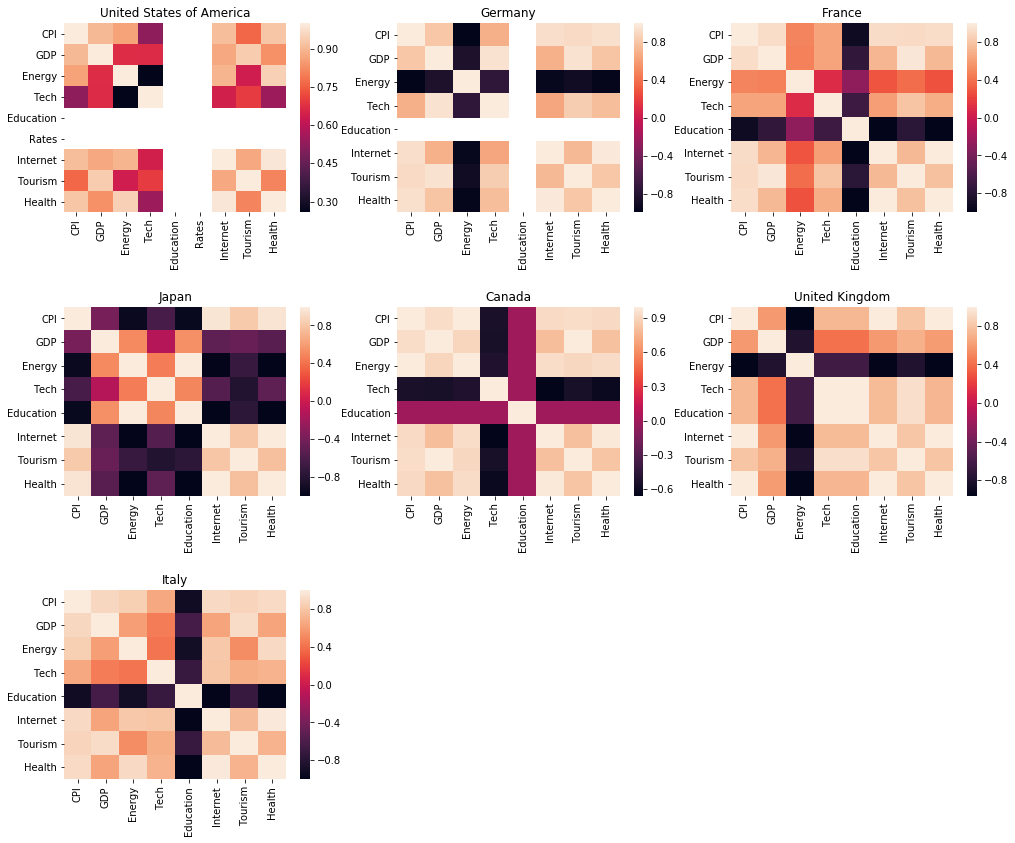

In [18]:
# G7 countries:
plt.figure(figsize = (15, 15))
plt.subplots_adjust(bottom = 0.5, right = 1, top = 1.2, hspace = 0.5)
for i in range(1, 8):
    plt.subplot(3, 3, i)
    corr = df1[G7[i - 1]].corr()
    sns.heatmap(corr, xticklabels = corr.columns.values, yticklabels = corr.columns.values)
    plt.title(G7[i - 1])

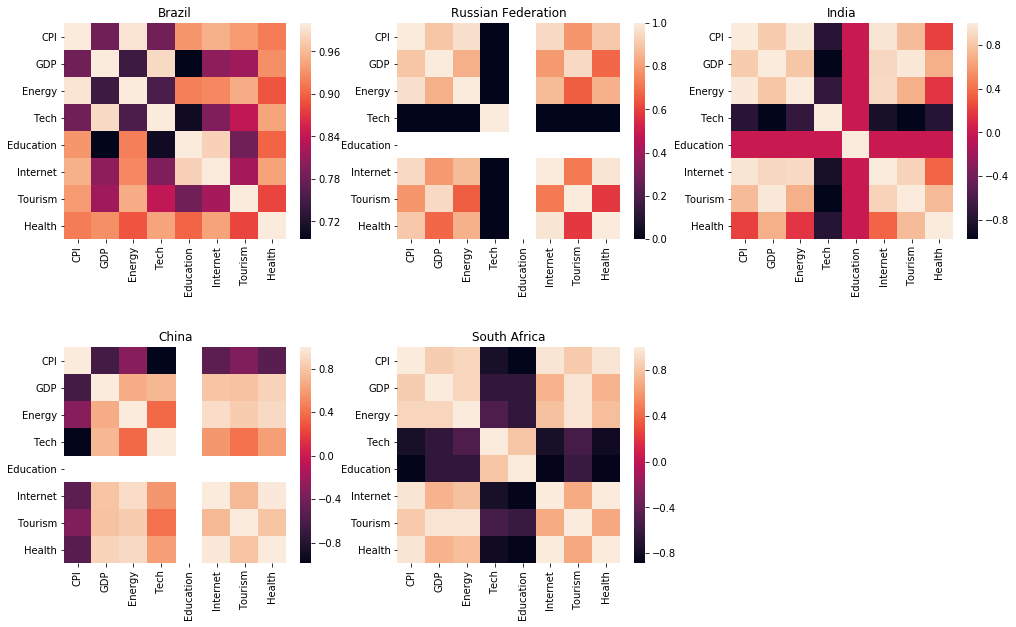

In [19]:
# BRICS countries:
plt.figure(figsize = (15, 15))
plt.subplots_adjust(bottom = 0.5, right = 1, top = 1, hspace = 0.5)
for i in range(1, 6):
    plt.subplot(2,3,i)
    corr = df2[BRICS[i-1]].corr()
    sns.heatmap(corr, xticklabels = corr.columns.values, yticklabels = corr.columns.values)
    plt.title(BRICS[i-1])

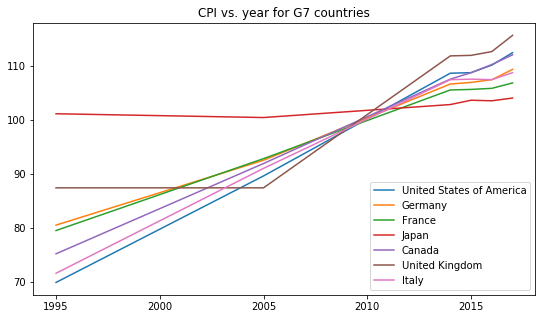

In [20]:
plt.figure(figsize = (9, 5))
for i in range(7):
    plt.plot(df1.index, df1[G7[i]].CPI, label = G7[i])
    plt.legend()
    plt.title("CPI vs. year for G7 countries")

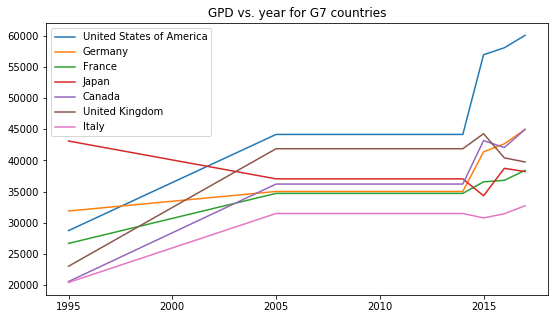

In [21]:
plt.figure(figsize = (9, 5))
for i in range(7):
    plt.plot(df1.index, df1[G7[i]].GDP, label = G7[i])
    plt.legend()
    plt.title("GPD vs. year for G7 countries")

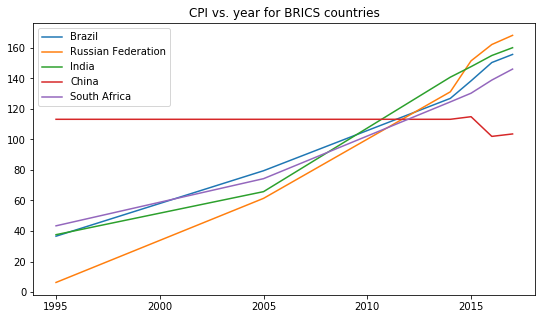

In [22]:
plt.figure(figsize = (9, 5))
for i in range(5):
    plt.plot(df2.index, df2[BRICS[i]].CPI, label = BRICS[i])
    plt.legend()
    plt.title("CPI vs. year for BRICS countries")

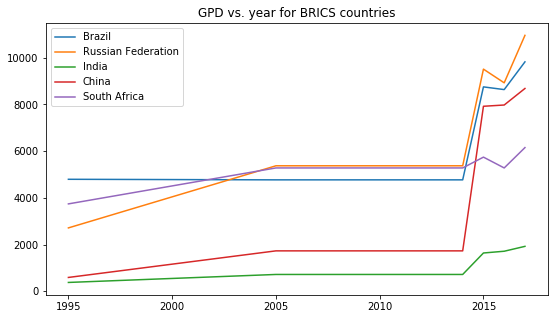

In [23]:
plt.figure(figsize = (9, 5))
for i in range(5):
    plt.plot(df2.index, df2[BRICS[i]].GDP, label = BRICS[i])
    plt.legend()
    plt.title("GPD vs. year for BRICS countries")

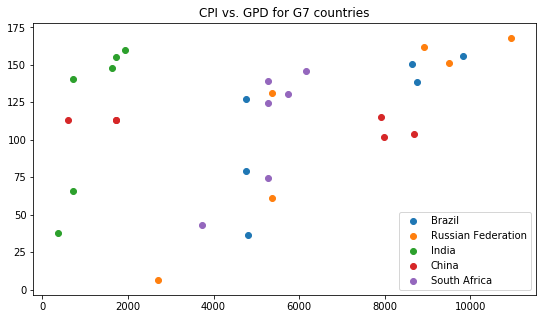

In [24]:
plt.figure(figsize = (9, 5))
colors = ["b","g","m","r","c","y","p"]
for i in range(5):
    plt.scatter(df2[BRICS[i]].GDP, df2[BRICS[i]].CPI, label = BRICS[i])
    plt.legend()
    plt.title("CPI vs. GPD for G7 countries")

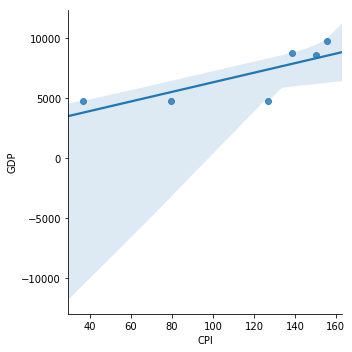

In [25]:
sns.lmplot("CPI", "GDP", data = df2[BRICS[0]])

<Figure size 648x360 with 0 Axes>

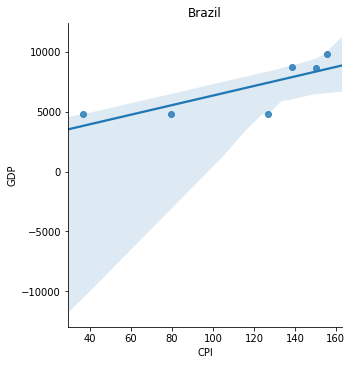

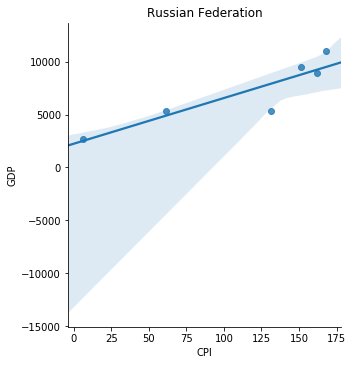

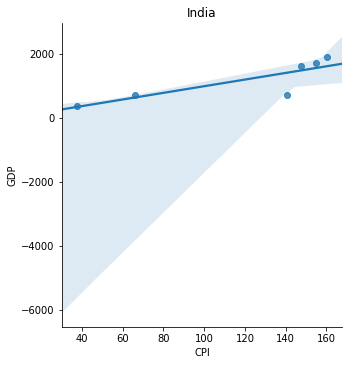

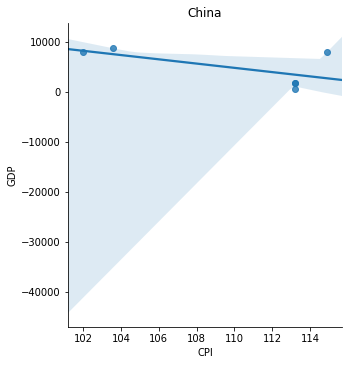

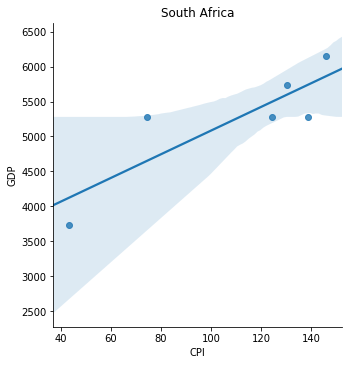

In [26]:
plt.figure(figsize = (9, 5))
colors = ["b","g","m","r","c","y","p"]
for i in range(5):
    # plt.subplot(2,3,i+1)
    sns.lmplot("CPI", "GDP", data = df2[BRICS[i]])
    plt.title(BRICS[i])


In [27]:
df1 = pd.concat([CPI.stack().loc[list(years), "Italy"], GDP.stack().loc[list(years), "Italy"], health.stack().loc[list(years), "Italy"]], axis = 1, keys = ["CPI", "GDP", "health"])

In [28]:
df2 = pd.concat([CPI.stack().loc[list(years), "France"], GDP.stack().loc[list(years), "France"], health.stack().loc[list(years), "France"]], axis = 1, keys = ["CPI", "GDP", "health"])

In [29]:
# Final dataframe for modeling:
G7 = ["United States of America", "Germany", "France", "Japan", "Canada", "United Kingdom", "Italy"]
BRICS = ["Brazil", "Russian Federation", "India", "China", "South Africa"]
df1 = pd.DataFrame()
for name in G7: 
    table = pd.DataFrame(CPI.stack().loc[list(years), name])
    table = pd.concat([table, pd.DataFrame(GDP.stack().loc[list(years), name]), pd.DataFrame(energy.stack().loc[list(years), name]), pd.DataFrame(tech.stack().loc[list(years), name]), 
                       pd.DataFrame(education.stack().loc[list(years), name]), pd.DataFrame(rates.stack().loc[list(years), name]), pd.DataFrame(internet.stack().loc[list(years), name]), pd.DataFrame(tourism.stack().loc[list(years), name]),
                       pd.DataFrame(health.stack().loc[list(years), name])], keys = ["CPI", "GDP", "Energy", "Tech", "Education", "Rates", "Internet", "Tourism", "Health"],
                     axis = 1)
    table.fillna(method = "ffill", inplace = True)
    table.fillna(method = "bfill", inplace = True)
    df1 = pd.concat([df1, table])
    
df2 = pd.DataFrame()
for name in BRICS: 
    table = pd.DataFrame(CPI.stack().loc[list(years), name])
    table = pd.concat([table, pd.DataFrame(GDP.stack().loc[list(years), name]), pd.DataFrame(energy.stack().loc[list(years), name]), pd.DataFrame(tech.stack().loc[list(years), name]), 
                       pd.DataFrame(education.stack().loc[list(years), name]), pd.DataFrame(rates.stack().loc[list(years), name]), pd.DataFrame(internet.stack().loc[list(years), name]), pd.DataFrame(tourism.stack().loc[list(years), name]),
                       pd.DataFrame(health.stack().loc[list(years), name])], keys = ["CPI", "GDP", "Energy", "Tech", "Education", "Rates", "Internet", "Tourism", "Health"],
                     axis = 1)
    table.fillna(method = "ffill", inplace = True)
    table.fillna(method = "bfill", inplace = True)
    df2 = pd.concat([df2, table])
    
df1.fillna(0, inplace = True)
df2.fillna(0, inplace = True)

df1.columns = df1.columns.droplevel(1)
df1["Country"] = df1.index.get_level_values(1)
df1.index = df1.index.droplevel(1)
df2.columns = df2.columns.droplevel(1)
df2["Country"] = df2.index.get_level_values(1)
df2.index = df2.index.droplevel(1)

In [30]:
# adding country_code variable:
# G7 countires: United States of America, Germany, France, Japan, Canada, United Kingdon and Italy
# BRICS countires: Brazil, Russian Federation, India, China and South Africa
code1 = {"United States of America" : 1, "Germany" : 2, "France" : 3, "Japan" : 4, "Canada" : 5, 
         "United Kingdom" : 6, "Italy" : 7}
code2 = {"Brazil" : 8, "Russian Federation" : 9, "India" : 10, "China" : 11, "South Africa" : 12}
df1["Country_code"] = [code1[country] for country in df1.Country]
df2["Country_code"] = [code2[country] for country in df2.Country]
df1.head()

,CPI,GDP,Energy,Tech,Education,Rates,Internet,Tourism,Health,Country,Country_code
Year,,,,,,,,,,,
1995,69.9,28758.0,68963.0,2.5,13.5,1,68.0,93743.0,14.5,United States of America,1
2005,89.6,44173.0,68124.0,2.5,13.5,1,68.0,122077.0,14.5,United States of America,1
2014,108.6,44173.0,83426.0,2.5,13.5,1,73.0,122077.0,16.5,United States of America,1
2015,108.7,56948.0,84051.0,2.5,13.5,1,74.6,249183.0,16.8,United States of America,1
2016,110.1,58064.0,79672.0,2.7,13.5,1,75.2,246172.0,16.8,United States of America,1


In [31]:
CPI.loc[years, G7].agg(["min","max"])

,United States of America,Germany,France,Japan,Canada,United Kingdom,Italy
min,69.9,80.5,79.5,100.4,75.2,87.4,71.6
max,112.4,109.3,106.8,104.0,112.0,115.6,108.7


In [32]:
CPI.loc[years, BRICS].agg(["min","max"])

,Brazil,Russian Federation,India,China,South Africa
min,36.6,6.3,37.6,102.0,43.4
max,155.7,168.2,160.1,114.9,146.1


In [33]:
# adding categorical label for response variable:
df1["CPI_Level"] = [4 if var > 150 else 3 if var > 120 else 2 if var > 80 else 1 for var in df1["CPI"]]
df2["CPI_Level"] = [3 if var > 120 else 3 if var > 120 else 2 if var > 80 else 1 for var in df2["CPI"]]

In [34]:
# reset the index of dataframes and create a column of years:
df1.reset_index(inplace = True)
df2.reset_index(inplace = True)
df2.head()

,Year,CPI,GDP,Energy,Tech,Education,Rates,Internet,Tourism,Health,Country,Country_code,CPI_Level
0,1995,36.6,4794.0,5038.0,1.0,11.3,0.9,21.0,1085.0,8.0,Brazil,8,1
1,2005,79.5,4770.0,8344.0,1.0,11.3,2.4,21.0,4168.0,8.0,Brazil,8,1
2,2014,126.9,4770.0,10965.0,1.0,15.7,2.4,54.6,4168.0,8.4,Brazil,8,3
3,2015,138.4,8750.0,11842.0,1.3,15.7,3.3,58.3,6254.0,8.9,Brazil,8,3
4,2016,150.4,8634.0,12183.0,1.3,15.7,3.5,60.9,6613.0,8.9,Brazil,8,3


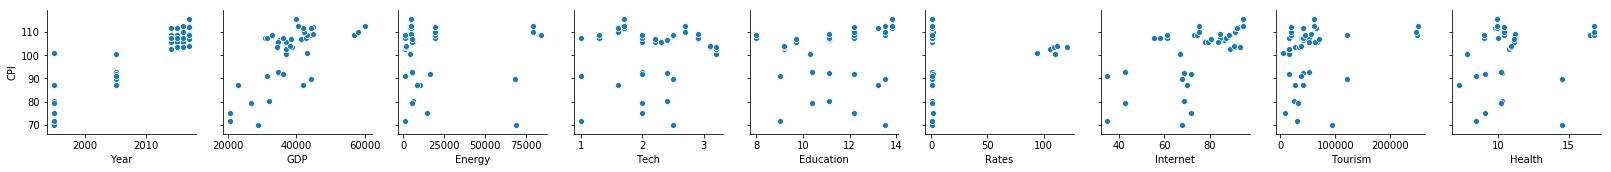

In [35]:
sns.pairplot(data = df1, y_vars = ['CPI'], x_vars = ['Year', 'GDP', 'Energy', 'Tech', 'Education', 'Rates', 'Internet', 'Tourism', 'Health'])

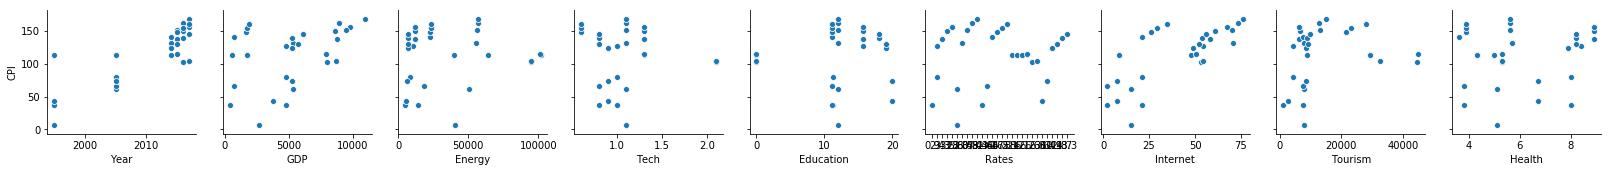

In [36]:
sns.pairplot(data = df2, y_vars = ['CPI'], x_vars = ['Year', 'GDP', 'Energy', 'Tech', 'Education', 'Rates', 'Internet', 'Tourism', 'Health'])

## 5. Data Modeling:

### Predictor variables:
- Year: categorical 
    - 6 levels: 1995, 2005, 2014, 2015, 2016, 2017
- Country_code: 
    - 7 levels for G7 (1 to 7)
    - 5 levels for BRICS (8 to 12)
- GDP: numeric
- Energy: numeric
- Tech: numeric
- Education: numeric
- Rates: numeric
- Internet: numeric
- Tourism: numeric
- Health: numeric
- Group (used in multiple linear regression only): categorical
    - 1 if the country is one of G7
    - 2 if the country is one of BRICS

### Response variable:

In part I: CPI_level 
- categorical variable with 4 categories (1, 2, 3, and 4)
  - CPI > 150: high CPI (class 4)
  - 120 < CPI <= 150: medium CPI (class 3)
  - 80 <= CPI <= 120: moderate CPI (class 2)
  - CPI <= 80: low CPI (class 1)
  
In part II: CPI
- numeric values of CPI

### Structure:
#### Part I: predcition on CPI_level (categorical):
  
(1) G7 countries modeling:
  - KNN classifier
  - Naive Bayes classifier
  
(2) BRICS countires modeling:
  - KNN classifier
  - Naive Bayes classifier
  
(3) G7 and BRICS combined:
  - KNN classifier
  - Naive Bayes classifier

#### Part II: prediction on CPI (numeric):

Multiple regression models on:
- G7 countries
- BRICS countries
- G7 and BRICS combined


In [37]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model, preprocessing, model_selection

In [38]:
# handling warning messages:
import warnings
warnings.filterwarnings('ignore')

## Part I: predicting CPI as categorical variables:
### Cross Validation sets:

In [39]:
x1 = df1.iloc[:, [0,2,3,4,5,6,7,8,9,11]].astype(float)
y1 = df1.iloc[:, 12]
x2 = df2.iloc[:, [0,2,3,4,5,6,7,8,9,11]].astype(float)
y2 = df2.iloc[:, 12]

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.2, random_state = 1, stratify = x1.Country_code)
print("training and testing sets for G7 countries:")
print((x1_train).shape)
print((x1_test).shape)
print(x1.shape)

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.2, random_state = 1, stratify = x2.Country_code)
print("training and testing sets for BRICS countries:")
print((x2_train).shape)
print((x2_test).shape)
print(x2.shape)

training and testing sets for G7 countries:
(33, 10)
(9, 10)
(42, 10)
training and testing sets for BRICS countries:
(24, 10)
(6, 10)
(30, 10)


### (1) G7 countries

### (a) KNN classifier:

In [40]:
knn = KNeighborsClassifier()
knn.fit(x1_train, y1_train)
prediction = knn.predict(x1_test)
print(prediction)
print(y1_test.values)
confusion_matrix(y1_test, prediction)

[2 2 2 2 2 2 2 2 2]
[1 1 2 2 2 2 2 2 2]


array([[0, 2],
       [0, 7]])

### Paramter search using GridSearchCV:

In [41]:
grids = {'n_neighbors': np.arange(1, 10), 'weights': ['uniform','distance']}
knn_grid = KNeighborsClassifier()
knn_grid = GridSearchCV(knn_grid, grids, cv = 5)
knn_grid.fit(x1_train, y1_train)

n = knn_grid.best_params_['n_neighbors']
knn = KNeighborsClassifier(n_neighbors = n)
print(n)
print(knn_grid.best_score_ )

knn.fit(x1_train, y1_train)
prediction = knn.predict(x1_test)
print(prediction)
print(y1_test.values)
confusion_matrix(y1_test, prediction)

3
0.9393939393939394
[2 2 2 2 2 2 2 2 2]
[1 1 2 2 2 2 2 2 2]


array([[0, 2],
       [0, 7]])

### (b) Naive Bayes Classifier:

In [42]:
naiveBayes = GaussianNB()
naiveBayes.fit(x1_train, y1_train)
print(naiveBayes.predict(x1_test))
print(y1_test.values)
confusion_matrix(y1_test, naiveBayes.predict(x1_test))

[2 2 2 2 2 2 2 2 2]
[1 1 2 2 2 2 2 2 2]


array([[0, 2],
       [0, 7]])

### (2) BRICS countires

### (a) KNN classifier:

In [43]:
knn = KNeighborsClassifier()
knn.fit(x2_train, y2_train)
prediction = knn.predict(x2_test)
print(prediction)
print(y2_test.values)
confusion_matrix(y2_test, prediction)

[3 2 3 1 2 3]
[3 2 1 1 2 1]


array([[1, 0, 2],
       [0, 2, 0],
       [0, 0, 1]])

### Paramter search using GridSearchCV:

In [44]:
grids = {'n_neighbors': np.arange(1, 10), 'weights': ['uniform','distance']}
knn_grid = KNeighborsClassifier()
knn_grid = GridSearchCV(knn_grid, grids, cv = 5)
knn_grid.fit(x2_train, y2_train)
print(n)
print(knn_grid.best_score_ )

n = knn_grid.best_params_['n_neighbors']
knn = KNeighborsClassifier(n_neighbors = n)
knn.fit(x2_train, y2_train)
prediction = knn.predict(x2_test)
print(prediction)
print(y2_test.values)
confusion_matrix(y2_test, prediction)

3
0.7916666666666666
[3 2 3 1 2 3]
[3 2 1 1 2 1]


array([[1, 0, 2],
       [0, 2, 0],
       [0, 0, 1]])

### (b) Naive Bayes Classifier:

In [45]:
naiveBayes = GaussianNB()
naiveBayes.fit(x2_train, y2_train)
print(naiveBayes.predict(x2_test))
print(y2_test.values)
confusion_matrix(y2_test, naiveBayes.predict(x2_test))

[3 2 1 1 2 1]
[3 2 1 1 2 1]


array([[3, 0, 0],
       [0, 2, 0],
       [0, 0, 1]])

### (3) G7 and BRICS combined:

### Cross Validation sets:

In [46]:
x1 = df1.iloc[:, [0,2,3,4,5,6,7,8,9,11]].astype(float)
y1 = df1.iloc[:, 12]
x2 = df2.iloc[:, [0,2,3,4,5,6,7,8,9,11]].astype(float)
y2 = df2.iloc[:, 12]

x = pd.concat([x1, x2])
y = pd.concat([y1, y2])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1, stratify = x.Country_code)
print("training and testing sets for two datasets combined:")
print((x_train).shape)
print((x_test).shape)
print(x.shape)

training and testing sets for two datasets combined:
(57, 10)
(15, 10)
(72, 10)


### (a) KNN classifier:

In [47]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)
print(prediction)
print(y_test.values)
confusion_matrix(y_test, prediction)

[2 3 2 2 3 3 3 2 2 2 2 1 1 1 2]
[2 3 2 2 2 3 3 2 2 2 2 3 1 3 1]


array([[1, 1, 0],
       [0, 7, 1],
       [2, 0, 3]])

### Paramter search using GridSearchCV:

In [48]:
grids = {'n_neighbors': np.arange(1, 10), 'weights': ['uniform','distance']}
knn_grid = KNeighborsClassifier()
knn_grid = GridSearchCV(knn_grid, grids, cv = 5)
knn_grid.fit(x_train, y_train)
print(n)
print(knn_grid.best_score_ )

n = knn_grid.best_params_['n_neighbors']
knn = KNeighborsClassifier(n_neighbors = n)
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)
print(prediction)
print(y_test.values)
confusion_matrix(y_test, prediction)

3
0.8245614035087719
[2 3 2 2 1 1 1 2 2 2 2 1 1 1 2]
[2 3 2 2 2 3 3 2 2 2 2 3 1 3 1]


array([[1, 1, 0],
       [1, 7, 0],
       [4, 0, 1]])

### (b) Naive Bayes Classifier:

In [49]:
naiveBayes = GaussianNB()
naiveBayes.fit(x_train, y_train)
print(naiveBayes.predict(x_test))
print(y_test.values)
(confusion_matrix(y_test, naiveBayes.predict(x_test)))

[2 3 2 2 1 3 3 1 2 2 2 3 1 3 1]
[2 3 2 2 2 3 3 2 2 2 2 3 1 3 1]


array([[2, 0, 0],
       [2, 6, 0],
       [0, 0, 5]])

### Part II: predicting CPI as a numeric variable
### Cross Validation sets:

In [50]:
# treat year and country_code as categorical variables:
x1 = df1.iloc[:, [0,2,3,4,5,6,7,8,9,11]]
y1 = df1.iloc[:, 1]
x2 = df2.iloc[:, [0,2,3,4,5,6,7,8,9,11]]
y2 = df2.iloc[:, 1]

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.2, random_state = 1, stratify = x1.Country_code)
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.2, random_state = 1, stratify = x2.Country_code)

x1["Group"] = 1
x2["Group"] = 2
x = pd.concat([x1, x2])
y = pd.concat([y1, y2])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1, stratify = x.Country_code)
print("training and testing sets for two datasets combined:")
print((x_train).shape)
print((x_test).shape)
print(x.shape)

training and testing sets for two datasets combined:
(57, 11)
(15, 11)
(72, 11)


### Multiple linear regression model for G7:

In [51]:
linear1 = linear_model.LinearRegression()
linear1.fit(x1_train, y1_train)
linear1.score(x1_train, y1_train)

0.914612472950444

### Multiple linear regression model for BRICS:

In [52]:
linear2 = linear_model.LinearRegression()
linear2.fit(x2_train, y2_train)
linear2.score(x2_train, y2_train)

0.9147682870036369

### Multiple linear regression model for G7 and BRICS combined:

In [53]:
linear = linear_model.LinearRegression()
linear.fit(x_train, y_train)
linear.score(x_train, y_train)

0.7486845283977734

### Cross Validation on linear model:

In [54]:
cv = model_selection.ShuffleSplit(n_splits = 3, test_size = 0.2, random_state = 0)
cv_linear = model_selection.cross_val_score(linear1, x1, y1, cv = cv)
print(cv_linear)
print(np.mean(cv_linear))

[0.74869989 0.621936   0.46861086]
0.6130822507682123


In [55]:
cv = model_selection.ShuffleSplit(n_splits = 3, test_size = 0.2, random_state = 0)
cv_linear = model_selection.cross_val_score(linear2, x2, y2, cv = cv)
print(cv_linear)
print(np.mean(cv_linear))

[0.72532364 0.90092383 0.55495633]
0.727067936819251


In [56]:
cv = model_selection.ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
cv_linear = model_selection.cross_val_score(linear, x, y, cv = cv)
print(cv_linear)
print(np.mean(cv_linear))

[ 0.45111735  0.69885307  0.8310866  -0.31746709  0.53869609]
0.4404572022625432


## 6. Results and Analysis: